In [1]:
try:
    # Google Colab only
    from google.colab import drive
    drive.mount('/content/gdrive')
    base_dir = '/content/gdrive/Shareddrives/Super-cool EE 460J/Project/'
except ImportError:
    base_dir = './'
print(base_dir)

Mounted at /content/gdrive
/content/gdrive/Shareddrives/Super-cool EE 460J/Project/


In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import os
import pandas as pd
import lightgbm as lgb
from pprint import pprint
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy import stats
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
!pip3 install catboost
import catboost as cb
#import shap
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
import sys
#!{sys.executable} -m pip install xgboost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import seaborn as sns
import time
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from collections import OrderedDict
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_log_error


sns.set(style="white", color_codes=True)
warnings.filterwarnings("ignore")
print("imports done")

     |████████████████████████████████| 67.3MB 64kB/s 
imports done


In [ ]:
#get the initial data
dataTrain = pd.read_csv('/content/gdrive/Shareddrives/Super-cool EE 460J/Project/boards_updated_train_small.csv', index_col=0)
dataTrain = dataTrain.loc[:,~dataTrain.columns.str.match("Unnamed")]
dataTrain.head()

,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8,stockfish_evaluation
0,0,0,1,1,3,1,0,0,1,0,1,1,0,0,1,-1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,0,0,0,...,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,18
1,0,1,1,1,3,1,0,0,1,1,1,1,0,0,2,1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,1,4,0,...,-1,1,0,0,0,1,-1,0,1,-1,0,0,0,-1,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,25
2,0,1,1,1,3,1,0,0,2,1,1,1,0,0,2,-1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,-1,1,1,0,1,1,-1,0,1,0,0,1,0,0,1,-1,-2,-3,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,34
3,0,1,1,1,3,1,0,0,2,1,1,1,0,0,3,1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,-1,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,107
4,0,1,2,3,3,1,0,0,2,1,1,1,0,0,3,-1,0,0,0,39,39,2,6,1,0,5,5,2,3,1,2,2,1,1,2,2,2,1,4,0,...,0,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,76


In [ ]:
#get the initial data
dataTest = pd.read_csv('/content/gdrive/Shareddrives/Super-cool EE 460J/Project/boards_updated_test_small.csv', index_col=0)
dataTest = dataTest.loc[:,~dataTest.columns.str.match("Unnamed")]
dataTest.head()

,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8,stockfish_evaluation
2000,0,6,6,4,3,1,2,0,3,2,0,0,0,0,31,-1,0,0,0,17,19,5,-1,6,5,11,-1,-1,-1,1,1,1,1,0,0,-1,-1,1,-1,9,...,1,1,1,0,2,0,0,1,1,2,0,-1,3,-2,1,0,-2,-1,-1,0,-3,1,-2,0,0,0,0,-1,-1,-1,0,-1,-1,-1,-1,-2,0,-2,-1,171
2001,0,6,6,1,3,1,2,0,3,2,0,0,0,0,32,1,0,0,0,17,19,5,-1,6,5,11,-1,-1,-1,1,1,1,1,0,0,-1,-1,1,-1,8,...,1,1,1,0,2,0,0,1,1,2,0,-1,3,-2,1,0,-2,-1,-1,-1,-2,1,-2,0,0,0,0,-2,0,-1,0,-1,-1,-1,-1,-1,-1,-2,-1,343
2002,0,6,6,4,3,1,2,0,3,2,0,0,0,0,32,-1,0,0,0,17,19,5,-1,7,6,7,-1,-1,-1,1,1,1,1,0,0,-1,-1,2,-1,7,...,1,1,0,1,1,0,0,1,1,2,1,-1,3,-2,1,0,-2,-1,-1,-1,-2,0,-2,0,0,0,0,-2,0,-1,-1,-1,-1,-1,-1,-1,-1,-2,-1,258
2003,0,6,6,1,3,1,2,0,3,2,0,0,0,0,33,1,0,0,0,17,19,5,-1,7,6,7,-1,-1,-1,1,1,1,1,0,0,-1,-1,2,-1,13,...,1,0,0,1,1,0,0,1,1,1,1,-1,3,-2,1,0,-2,-2,-1,0,-2,0,-2,0,0,-1,0,-1,0,-1,-1,-1,-1,0,-1,-2,-1,-2,-1,253
2004,0,6,6,3,3,1,2,0,3,2,0,0,0,0,33,-1,0,0,0,17,19,5,-1,8,6,11,-1,-1,-1,1,1,1,1,0,0,-1,-1,1,-1,13,...,1,0,0,2,1,0,0,1,1,1,0,0,3,-2,1,0,-2,-2,0,0,-1,1,-2,0,0,-1,0,-1,0,-1,0,-1,-1,0,-1,-2,-1,-2,-1,230


In [ ]:
Y = dataTrain['stockfish_evaluation']
X = dataTrain.drop('stockfish_evaluation', 1)
print(X.shape) #(2000 board states, 350 features)
print(Y) #the 2000 corresponding stockfish evaluations
X.head()

(2000, 333)
0        18
1        25
2        34
3       107
4        76
       ... 
1995    385
1996    301
1997    331
1998    269
1999    250
Name: stockfish_evaluation, Length: 2000, dtype: int64


,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_a4,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8
0,0,0,1,1,3,1,0,0,1,0,1,1,0,0,1,-1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
1,0,1,1,1,3,1,0,0,1,1,1,1,0,0,2,1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,1,4,0,...,0,-1,1,0,0,0,1,-1,0,1,-1,0,0,0,-1,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
2,0,1,1,1,3,1,0,0,2,1,1,1,0,0,2,-1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,0,-1,1,1,0,1,1,-1,0,1,0,0,1,0,0,1,-1,-2,-3,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
3,0,1,1,1,3,1,0,0,2,1,1,1,0,0,3,1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,0,-1,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
4,0,1,2,3,3,1,0,0,2,1,1,1,0,0,3,-1,0,0,0,39,39,2,6,1,0,5,5,2,3,1,2,2,1,1,2,2,2,1,4,0,...,0,0,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0


In [ ]:
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
#linear regression
model = LinearRegression().fit(X_train, y_train)

In [ ]:
model.predict(X_test)
model.score(X_test,y_test) #42% testing score, yikes

0.4156725475215206

In [ ]:
model.predict(X_train)
model.score(X_train,y_train) #70% training score

0.7074006081851427

In [ ]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [ ]:
#ridge regression
params_Ridge = {'alpha': [1,0.1,0.01,0.001] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

Ridge_GS = GridSearchCV(Ridge(), param_grid=params_Ridge, n_jobs=-1, cv=3, verbose = 2)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_
#{'alpha': 0.001, 'fit_intercept': True, 'solver': 'cholesky'} for all_boards_train.csv
#{'alpha': 1, 'fit_intercept': False, 'solver': 'saga'} for all_boards_train_small.csv

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  1.5min finished


{'alpha': 1, 'fit_intercept': False, 'solver': 'saga'}

In [ ]:
param_grid = {'alpha': 1, 'fit_intercept': False, 'solver': 'saga'}

ridge_regression = Ridge(alpha=0.001, fit_intercept=True, solver='cholesky')
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=ridge_regression, X=X_train, y=y_train, cv=5)
all_accuracies

array([0.48002941, 0.24077877, 0.44431552, 0.54364448, 0.22238235])

In [ ]:
ridge_regression.fit(X_train,y_train)
ridge_regression.score(X_test,y_test) #grid search ridge made basically 0 difference from linear, still 44% accuracy on all_boards_train.csv
#35% accuracy on all_boards_train_small.csv

0.35048993993641187

In [ ]:
#polynomial regression (only degree 2 due to RAM required)
# Set PolynomialFeatures to degree 2 and store in the variable pre_process
# Degree 2 preprocesses x to 1, x and x^2
# Degree 3 preprocesses x to 1, x, x^2 and x^3
# and so on..
 
pre_process = PolynomialFeatures(degree=2)
# Transform our x input to 1, x and x^2
X_train_poly = pre_process.fit_transform(X_train)
# Show the transformation on the notebook
X_train_poly

In [ ]:
pr_model = LinearRegression()
pr_model.fit(X_train_poly, y_train)
y_pred = pr_model.predict(X_train_poly)
#mean squared error of 2.7 for degree=2 on all_boards_train_small.csv
#any degree higher than 2 causes colab session to crash due to running out of RAM

In [ ]:
mean_squared_error(y_train, y_pred)

2.7010011761414328

In [ ]:
#xgboost regressor
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8) #arbitrary parameters to get a feel for the basic evaluation
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(XGBR, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean Mean-Absolute-Error: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 901.353 (287.972)


In [ ]:
#RandomizedSearchCV to find good parameters
random_grid = {'n_estimators': [100, 200, 300, 400, 500],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
              'subsample': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'min_child_weight': [1, 2, 3, 4]
             }
XGBR = XGBRegressor()
XGBR_random = RandomizedSearchCV(estimator = XGBR, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, random_state=42, n_jobs = -1)
XGBR_random.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.1min finished


[03:18:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        

In [ ]:
XGBR_random.best_params_
#for all_boards_train_small.csv, {'colsample_bytree': 0.6,'learning_rate': 0.3,'max_depth': 6,'min_child_weight': 1,'n_estimators': 100,'subsample': 0.8}
#for boards_updated_train_small.csv, {'colsample_bytree': 0.6,'learning_rate': 0.01,'max_depth': 7,'min_child_weight': 1,'n_estimators': 500,'subsample': 0.8}

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
XGBR = XGBRegressor(colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8)
XGBR.fit(X_train, y_train)
score = XGBR.score(X_train, y_train)  
print("Training score: ", score)
#99% training score on all_boards_train_small.csv
#98.9% training score on boards_updated_train_small.csv
#94.5% training score on boards_updated_train_1000.csv

In [ ]:
score = XGBR.score(X_test, y_test)
print("Testing score: ", score)
#31% after training on all_boards_train_small.csv
#58% after training on boards_udpated_train_small.csv
#90% after training on boards_updated_train_10000.csv

Testing score:  0.9029714704397833


In [ ]:
y_pred = XGBR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 2868470.16
RMSE: 1693.66


In [ ]:
score = XGBR.score(X_test_10000, y_test_10000) #boards_updated_test_10000.csv
print("Testing score: ", score) #53% testing score from the 10000-board-state training model with 94.5% training score
#this is the r2 score

Testing score:  0.5323468144579715


In [ ]:
y_test_2 = dataTest['stockfish_evaluation']
X_test_2 = dataTest.drop('stockfish_evaluation', 1)

In [ ]:
score = XGBR.score(X_test_2, y_test_2)
print("Testing score: ", score)
#19% after training on 2000 board states, but 95.5% after training on 10000 board states

Testing score:  0.955816811835975


In [39]:
#try a larger training set (10000 instead of 2000 board states)
dataTrain2 = pd.read_csv('/content/gdrive/Shareddrives/Super-cool EE 460J/Project/boards_updated_train_10000.csv', index_col=0)
print(dataTrain2.shape)
dataTrain2.head()

(10000, 334)


,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8,stockfish_evaluation
0,0,0,1,1,3,1,0,0,1,0,1,1,0,0,1,-1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,0,0,0,...,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,18
1,0,1,1,1,3,1,0,0,1,1,1,1,0,0,2,1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,1,4,0,...,-1,1,0,0,0,1,-1,0,1,-1,0,0,0,-1,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,25
2,0,1,1,1,3,1,0,0,2,1,1,1,0,0,2,-1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,-1,1,1,0,1,1,-1,0,1,0,0,1,0,0,1,-1,-2,-3,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,34
3,0,1,1,1,3,1,0,0,2,1,1,1,0,0,3,1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,-1,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,107
4,0,1,2,3,3,1,0,0,2,1,1,1,0,0,3,-1,0,0,0,39,39,2,6,1,0,5,5,2,3,1,2,2,1,1,2,2,2,1,4,0,...,0,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0,76


In [40]:
y_train_10000 = dataTrain2['stockfish_evaluation']
X_train_10000 = dataTrain2.drop('stockfish_evaluation', 1)
print(X_train_10000.shape)
print(y_train_10000)
X_train_10000.head()

(10000, 333)
0        18
1        25
2        34
3       107
4        76
       ... 
9995     62
9996    215
9997    245
9998    299
9999    299
Name: stockfish_evaluation, Length: 10000, dtype: int64


,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_a4,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8
0,0,0,1,1,3,1,0,0,1,0,1,1,0,0,1,-1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,0,0,0,...,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
1,0,1,1,1,3,1,0,0,1,1,1,1,0,0,2,1,0,0,0,39,39,1,4,0,0,0,5,2,3,2,2,2,2,1,2,2,2,1,4,0,...,0,-1,1,0,0,0,1,-1,0,1,-1,0,0,0,-1,1,-1,-2,-3,-2,-2,-3,-2,-2,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
2,0,1,1,1,3,1,0,0,2,1,1,1,0,0,2,-1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,0,-1,1,1,0,1,1,-1,0,1,0,0,1,0,0,1,-1,-2,-3,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
3,0,1,1,1,3,1,0,0,2,1,1,1,0,0,3,1,0,0,0,39,39,2,6,0,0,5,5,3,3,2,2,2,1,1,2,2,2,1,4,0,...,0,-1,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0
4,0,1,2,3,3,1,0,0,2,1,1,1,0,0,3,-1,0,0,0,39,39,2,6,1,0,5,5,2,3,1,2,2,1,1,2,2,2,1,4,0,...,0,0,1,1,0,1,1,-1,-1,1,-1,0,1,0,0,1,-1,-2,-2,-2,-2,-3,-2,-1,-1,-1,-1,-4,-4,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,0


In [6]:
#test on a larger testing set (10000 board states)
dataTest2 = pd.read_csv('/content/gdrive/Shareddrives/Super-cool EE 460J/Project/boards_updated_test_10000.csv', index_col=0)
dataTest2 = dataTest2.loc[:,~dataTest2.columns.str.match("Unnamed")]
print(dataTest2.shape)
dataTest2.head()

(10000, 334)


,current_player_in_check,white_pieces_moved_upto_now,black_pieces_moved_upto_now,piece_moved,white_pawn_islands,black_pawn_islands,black_single_pawns,white_single_pawns,white_king_mobility_top3,black_king_mobility_top3,white_can_castle,black_can_castle,white_has_castled,black_has_castled,fullmove_number,player_to_move,is_checkmate,is_stalemate,is_insufficient_material,black_material,white_material,K0_mobility,Q0_mobility,R0_mobility,R1_mobility,B0_mobility,B1_mobility,N0_mobility,N1_mobility,P0_mobility,P1_mobility,P2_mobility,P3_mobility,P4_mobility,P5_mobility,P6_mobility,P7_mobility,k0_mobility,q0_mobility,r0_mobility,...,side_controlling_b4,side_controlling_c4,side_controlling_d4,side_controlling_e4,side_controlling_f4,side_controlling_g4,side_controlling_h4,side_controlling_a5,side_controlling_b5,side_controlling_c5,side_controlling_d5,side_controlling_e5,side_controlling_f5,side_controlling_g5,side_controlling_h5,side_controlling_a6,side_controlling_b6,side_controlling_c6,side_controlling_d6,side_controlling_e6,side_controlling_f6,side_controlling_g6,side_controlling_h6,side_controlling_a7,side_controlling_b7,side_controlling_c7,side_controlling_d7,side_controlling_e7,side_controlling_f7,side_controlling_g7,side_controlling_h7,side_controlling_a8,side_controlling_b8,side_controlling_c8,side_controlling_d8,side_controlling_e8,side_controlling_f8,side_controlling_g8,side_controlling_h8,stockfish_evaluation
10000,0,5,4,2,2,2,1,1,0,1,0,1,0,0,15,1,0,0,0,35,35,2,5,4,2,3,-1,5,2,1,0,1,0,0,2,2,-1,3,9,4,...,0,1,2,0,1,0,1,-1,-1,-1,-3,2,-1,2,0,-1,0,-1,-1,-2,-1,-2,-1,-2,-2,-1,-2,-4,-2,-1,-1,-1,-1,-2,-3,-2,-1,-1,0,393
10001,0,5,4,3,2,2,0,1,0,1,0,1,0,0,15,-1,0,0,0,34,35,2,7,4,2,5,-1,6,3,1,0,1,0,0,2,2,-1,3,9,4,...,0,0,3,-1,1,0,1,0,-1,-1,-3,3,-1,2,0,-1,1,-1,0,-2,-1,-2,-1,-2,-2,-1,-2,-4,-2,-1,-1,-1,-1,-2,-3,-2,-1,-1,0,415
10002,0,6,4,5,2,2,0,1,0,0,0,1,0,0,16,1,0,0,0,34,35,2,7,4,2,5,-1,6,3,1,0,1,0,0,2,2,-1,3,8,4,...,0,0,3,-1,1,0,0,0,-1,-1,-3,3,-1,1,0,-1,1,-1,0,-2,-2,-2,-1,-2,-2,-1,-2,-3,-1,0,-1,-1,-1,-2,-4,-2,-2,-1,0,658
10003,0,6,5,4,2,2,0,1,0,0,0,1,0,0,16,-1,0,0,0,34,35,2,9,5,5,5,-1,6,3,1,0,1,0,0,2,2,-1,3,8,4,...,1,1,2,-1,1,0,0,0,0,-1,-3,3,-1,1,0,-1,2,-1,0,-2,-2,-2,-1,-2,-2,-1,-2,-3,-1,0,-1,-1,-1,-2,-4,-2,-2,-1,0,166
10004,0,6,5,5,2,2,0,1,0,0,0,1,0,0,17,1,0,0,0,34,35,2,9,5,5,5,-1,6,3,1,0,1,0,0,2,2,-1,2,8,4,...,1,1,2,-1,1,0,0,0,0,-1,-3,3,-1,1,0,0,1,-1,0,-2,-2,-2,-1,-1,-3,-1,-2,-3,-1,0,-1,-2,0,-2,-4,-2,-2,-1,0,348


In [7]:
y_test_10000 = dataTest2['stockfish_evaluation']
X_test_10000 = dataTest2.drop('stockfish_evaluation', 1)

In [8]:
#catboost
train_dataset = cb.Pool(X_train_10000, y_train_10000) 
test_dataset = cb.Pool(X_test_10000, y_test_10000)

In [9]:
cbmodel = cb.CatBoostRegressor(loss_function='RMSE')

In [10]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3, 5]}
grid_results = cbmodel.grid_search(grid, train_dataset)

Streaming output truncated to the last 5000 lines.
151:	learn: 3453.6060843	test: 3594.1903987	best: 3594.1903987 (151)	total: 2.19s	remaining: 692ms
152:	learn: 3447.7708418	test: 3589.4963758	best: 3589.4963758 (152)	total: 2.2s	remaining: 677ms
153:	learn: 3444.3971619	test: 3588.4859978	best: 3588.4859978 (153)	total: 2.21s	remaining: 662ms
154:	learn: 3437.6702989	test: 3587.0113747	best: 3587.0113747 (154)	total: 2.23s	remaining: 647ms
155:	learn: 3434.5032675	test: 3586.3543516	best: 3586.3543516 (155)	total: 2.25s	remaining: 635ms
156:	learn: 3429.4169204	test: 3583.9082317	best: 3583.9082317 (156)	total: 2.27s	remaining: 621ms
157:	learn: 3424.7029820	test: 3581.0791903	best: 3581.0791903 (157)	total: 2.28s	remaining: 607ms
158:	learn: 3419.8961926	test: 3578.9361687	best: 3578.9361687 (158)	total: 2.29s	remaining: 592ms
159:	learn: 3415.3096614	test: 3575.8500194	best: 3575.8500194 (159)	total: 2.31s	remaining: 577ms
160:	learn: 3410.4174057	test: 3573.7234259	best: 3573.7234

In [11]:
print(grid_results['params']) #gave 0.947 training score on boards_updated_train_10000, and a testing score of 0.565 on boards_updated_test_10000

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1, 'l2_leaf_reg': 0.5}


In [37]:
cb_pred = cbmodel.predict(X_test_10000)
rmse = (np.sqrt(mean_squared_error(y_test_10000, cb_pred)))
r2 = r2_score(y_test_10000, cb_pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 4413.63
R2: 0.57


In [38]:
print(r2_score(y_test_10000, XGBR.predict(X_test_10000))) #cat boost is slightly better

0.5323468144579715


In [40]:
print(r2_score(y_test_10000, cbmodel.predict(X_test_10000)))

0.5659394289731297


In [44]:
cb_features = cbmodel.get_feature_importance(train_dataset, prettified=True)
print(cb_features) #catboost shows top 5 features as black_material, white_material, Q0_rank, R1_rank, and q0_mobility

           Feature Id  Importances
0      black_material    12.291111
1      white_material     7.572709
2             Q0_rank     4.574621
3             R1_rank     3.894238
4         q0_mobility     2.881960
..                ...          ...
328  white_e4_control     0.000000
329  black_c6_control     0.000000
330  black_f7_control     0.000000
331  black_a8_control     0.000000
332  black_b8_control     0.000000

[333 rows x 2 columns]


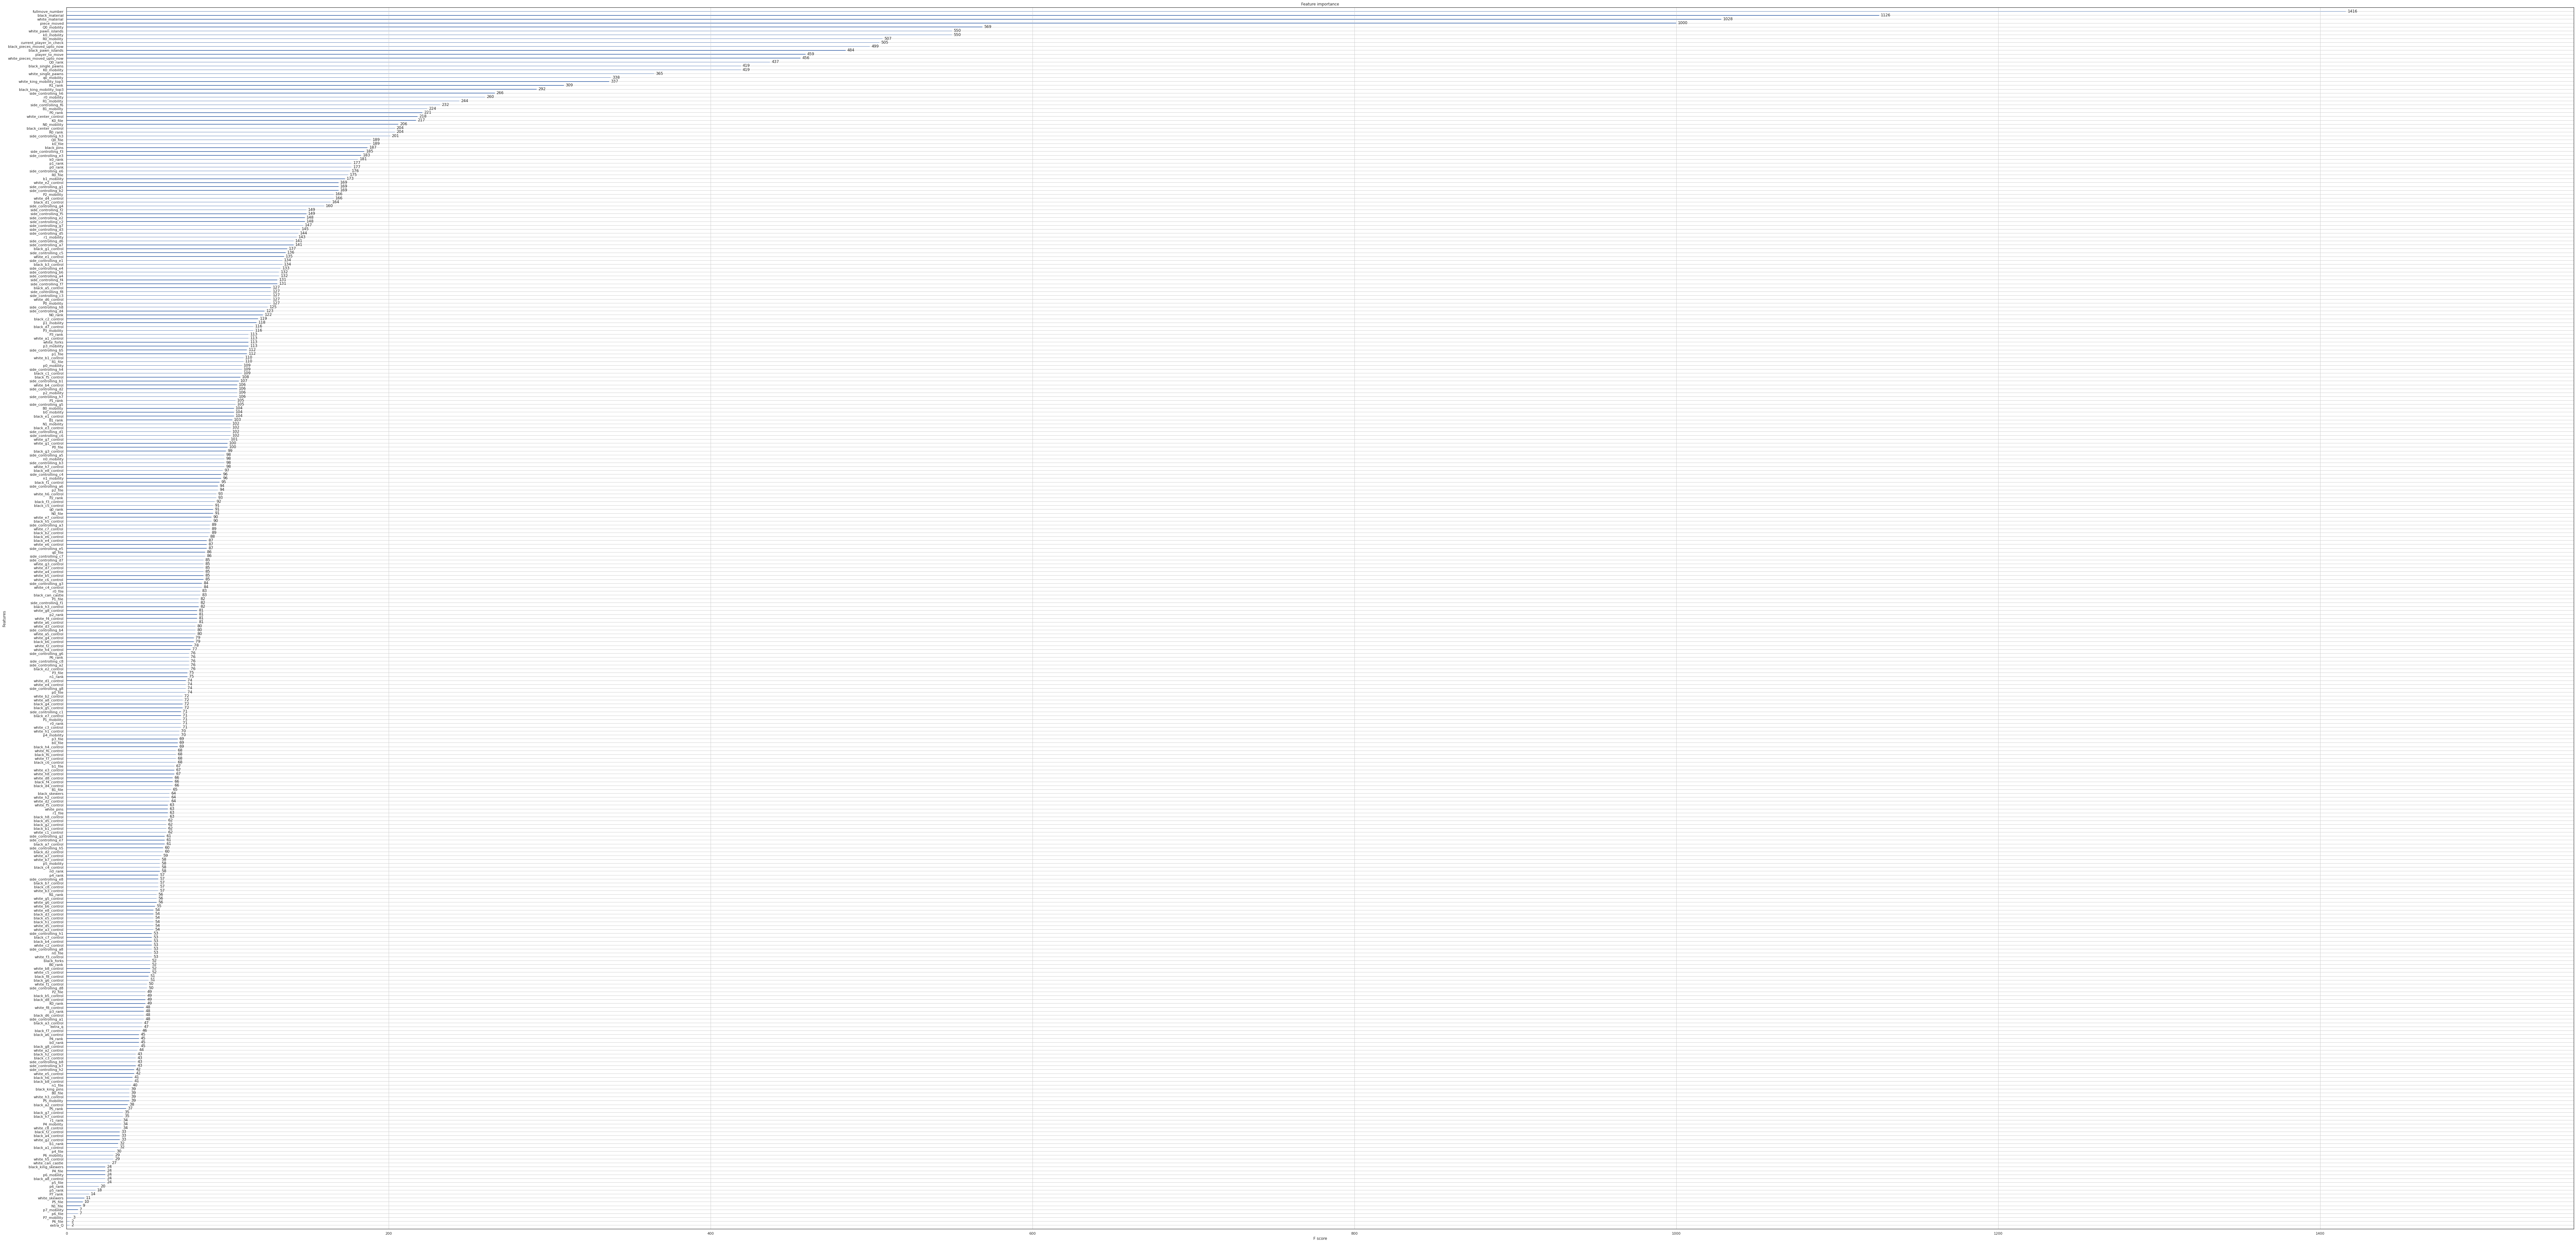

In [54]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (140, 70)
plot_importance(XGBR) #xgboost shows top 5 features as fullmove_number, black_material, white_material, piece_moved, and Q0mobility

In [72]:
#lightgbm
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [75]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [77]:
gbm.fit(X_train_10000, y_train_10000,
        eval_set=[(X_test_10000, y_test_10000)],
        eval_metric='l1', #lasso
        early_stopping_rounds=1000)

[1]	valid_0's auc: 0.576675	valid_0's l1: 2597.81	valid_0's l2: 4.5257e+07
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.599973	valid_0's l1: 2591.11	valid_0's l2: 4.51028e+07
[3]	valid_0's auc: 0.604656	valid_0's l1: 2583.95	valid_0's l2: 4.49166e+07
[4]	valid_0's auc: 0.606321	valid_0's l1: 2576.93	valid_0's l2: 4.47328e+07
[5]	valid_0's auc: 0.605481	valid_0's l1: 2569.33	valid_0's l2: 4.45405e+07
[6]	valid_0's auc: 0.604271	valid_0's l1: 2563.11	valid_0's l2: 4.43631e+07
[7]	valid_0's auc: 0.601903	valid_0's l1: 2556.46	valid_0's l2: 4.41882e+07
[8]	valid_0's auc: 0.604294	valid_0's l1: 2549.7	valid_0's l2: 4.40112e+07
[9]	valid_0's auc: 0.609707	valid_0's l1: 2543.68	valid_0's l2: 4.38441e+07
[10]	valid_0's auc: 0.608153	valid_0's l1: 2537.27	valid_0's l2: 4.36732e+07
[11]	valid_0's auc: 0.627339	valid_0's l1: 2530.38	valid_0's l2: 4.34999e+07
[12]	valid_0's auc: 0.648343	valid_0's l1: 2524.13	valid_0's l2: 4.33385e+07
[13]	valid_0's auc: 0.6

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [78]:
y_pred_gbm = gbm.predict(X_train_10000, num_iteration=gbm.best_iteration_)

In [84]:
print(r2_score(y_test_10000, y_pred_gbm)) #negative r squared score means the model is really really bad

-0.6869596133040885


In [87]:
gbm = lgb.LGBMRegressor(**hyper_params)
gbm.fit(X_train_10000, y_train_10000,
        eval_set=[(X_test_10000, y_test_10000)],
        eval_metric='l2', #ridge
        early_stopping_rounds=1000)

[1]	valid_0's auc: 0.576675	valid_0's l2: 4.5257e+07
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's auc: 0.599973	valid_0's l2: 4.51028e+07
[3]	valid_0's auc: 0.604656	valid_0's l2: 4.49166e+07
[4]	valid_0's auc: 0.606321	valid_0's l2: 4.47328e+07
[5]	valid_0's auc: 0.605481	valid_0's l2: 4.45405e+07
[6]	valid_0's auc: 0.604271	valid_0's l2: 4.43631e+07
[7]	valid_0's auc: 0.601903	valid_0's l2: 4.41882e+07
[8]	valid_0's auc: 0.604294	valid_0's l2: 4.40112e+07
[9]	valid_0's auc: 0.609707	valid_0's l2: 4.38441e+07
[10]	valid_0's auc: 0.608153	valid_0's l2: 4.36732e+07
[11]	valid_0's auc: 0.627339	valid_0's l2: 4.34999e+07
[12]	valid_0's auc: 0.648343	valid_0's l2: 4.33385e+07
[13]	valid_0's auc: 0.648916	valid_0's l2: 4.31695e+07
[14]	valid_0's auc: 0.650984	valid_0's l2: 4.30033e+07
[15]	valid_0's auc: 0.655302	valid_0's l2: 4.28456e+07
[16]	valid_0's auc: 0.663598	valid_0's l2: 4.26935e+07
[17]	valid_0's auc: 0.672071	valid_0's l2: 4.25072e+07
[18]	valid_

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=512,
              max_depth=8, metric=['l2', 'auc'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
              n_jobs=-1, num_iterations=100000, num_leaves=128,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [88]:
y_pred_gbm2 = gbm.predict(X_train_10000, num_iteration=gbm.best_iteration_)
print(r2_score(y_test_10000, y_pred_gbm2)) #changing from l1 to l2 made it even worse

-0.8572636171425003


In [41]:
#catboost, but specifying categorical features this time
cat_indicies = []
cat_indicies.append(X_train_10000.columns.get_loc('piece_moved'))
cat_indicies.append(X_train_10000.columns.get_loc('current_player_in_check'))
cat_indicies.append(X_train_10000.columns.get_loc('player_to_move'))
cat_indicies.append(X_train_10000.columns.get_loc('white_can_castle'))
cat_indicies.append(X_train_10000.columns.get_loc('black_can_castle'))
cat_indicies.append(X_train_10000.columns.get_loc('white_has_castled'))
cat_indicies.append(X_train_10000.columns.get_loc('black_has_castled'))
cat_indicies.append(X_train_10000.columns.get_loc('is_checkmate'))
cat_indicies.append(X_train_10000.columns.get_loc('is_stalemate'))
cat_indicies.append(X_train_10000.columns.get_loc('is_insufficient_material'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h1'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h2'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h3'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h4'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h5'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h6'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h7'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_a8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_b8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_c8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_d8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_e8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_f8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_g8'))
cat_indicies.append(X_train_10000.columns.get_loc('side_controlling_h8'))
print(cat_indicies)

[3, 0, 15, 10, 11, 12, 13, 16, 17, 18, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]


In [42]:
for col in cat_indicies:
  X_train_10000.iloc[:,col] = X_train_10000.iloc[:,col].astype('category')

In [30]:
print(X_train_10000.iloc[:,1]) #column 1

0       0
1       1
2       1
3       1
4       1
       ..
9995    5
9996    5
9997    5
9998    5
9999    5
Name: white_pieces_moved_upto_now, Length: 10000, dtype: int64


In [47]:
cat_train_dataset = cb.Pool(X_train_10000,y_train_10000, cat_features=cat_indicies)
cat_test_dataset = cb.Pool(X_test_10000,y_test_10000, cat_features=cat_indicies)
cbmodelcategorical = cb.CatBoostRegressor(loss_function='RMSE')

In [48]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3, 5]}
grid_results = cbmodelcategorical.grid_search(grid, cat_train_dataset)

Streaming output truncated to the last 5000 lines.
6:	learn: 5366.7808392	test: 5195.3672981	best: 5195.3672981 (6)	total: 1.01s	remaining: 27.8s
7:	learn: 5227.8883645	test: 5052.9386925	best: 5052.9386925 (7)	total: 1.15s	remaining: 27.6s
8:	learn: 5110.0005267	test: 4934.0918758	best: 4934.0918758 (8)	total: 1.3s	remaining: 27.6s
9:	learn: 4985.7907478	test: 4794.5117519	best: 4794.5117519 (9)	total: 1.45s	remaining: 27.6s
10:	learn: 4898.9341220	test: 4704.9897080	best: 4704.9897080 (10)	total: 1.61s	remaining: 27.6s
11:	learn: 4800.2146016	test: 4624.6046900	best: 4624.6046900 (11)	total: 1.75s	remaining: 27.4s
12:	learn: 4715.3387557	test: 4541.9209096	best: 4541.9209096 (12)	total: 1.9s	remaining: 27.3s
13:	learn: 4632.6098997	test: 4469.5409870	best: 4469.5409870 (13)	total: 2.03s	remaining: 26.9s
14:	learn: 4581.5395352	test: 4429.6254895	best: 4429.6254895 (14)	total: 2.17s	remaining: 26.8s
15:	learn: 4513.8554465	test: 4363.5788191	best: 4363.5788191 (15)	total: 2.32s	remain

In [49]:
cat_pred = cbmodelcategorical.predict(X_test_10000)
rmse = (np.sqrt(mean_squared_error(y_test_10000, cat_pred)))
r2 = r2_score(y_test_10000, cat_pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 4445.20
R2: 0.56
